In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


%matplotlib inline

In [183]:
df = pd.read_csv('googleplaystore.csv')

In [184]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [185]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [186]:
df.shape

(10841, 13)

In [187]:
df.size

140933

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [189]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [190]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [191]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [192]:
df.loc[10471]

App               Xposed Wi-Fi-Pwd
Category           PERSONALIZATION
Rating                         3.5
Reviews                       1042
Size                          404k
Installs                  100,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres             Personalization
Last Updated        August 5, 2014
Current Ver                  3.0.0
Android Ver           4.0.3 and up
Name: 10471, dtype: object

In [193]:
df.drop(df.index[10472],inplace=True)

In [194]:
df.shape

(10840, 13)

In [195]:
df['Installs']=df['Installs'].map(lambda x: x.rstrip('+'))

In [196]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace(',',''))

In [197]:
df['Price']=pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_22812\2427272306.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=pd.to_numeric(df['Price'].str.replace('$',''))


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [199]:
df['Installs'].max(),df['Installs'].min()

(1000000000, 0)

In [200]:
df['Log_Installs']=np.log10(df['Installs'])

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [201]:
df['App'].duplicated().any()

True

In [202]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [203]:
df[df['App']== 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0


In [204]:
df.drop_duplicates(inplace=True)

In [205]:
df['Reviews']=pd.to_numeric(df['Reviews'].str.replace('$',''))

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_22812\1636454155.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Reviews']=pd.to_numeric(df['Reviews'].str.replace('$',''))


In [206]:
df=df.loc[df.groupby(['App'])['Reviews'].idxmax()]

In [207]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(9,5)
plt.rcParams['figure.facecolor']='#00000000'

In [208]:
top_geners=df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [209]:
genres_installs=df.groupby(['Genres'])[['Installs']].sum()

In [210]:
top_geners_installs=pd.merge(top_geners,genres_installs, on='Genres')
top_20_geners_installs=top_geners_installs.head(20)

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


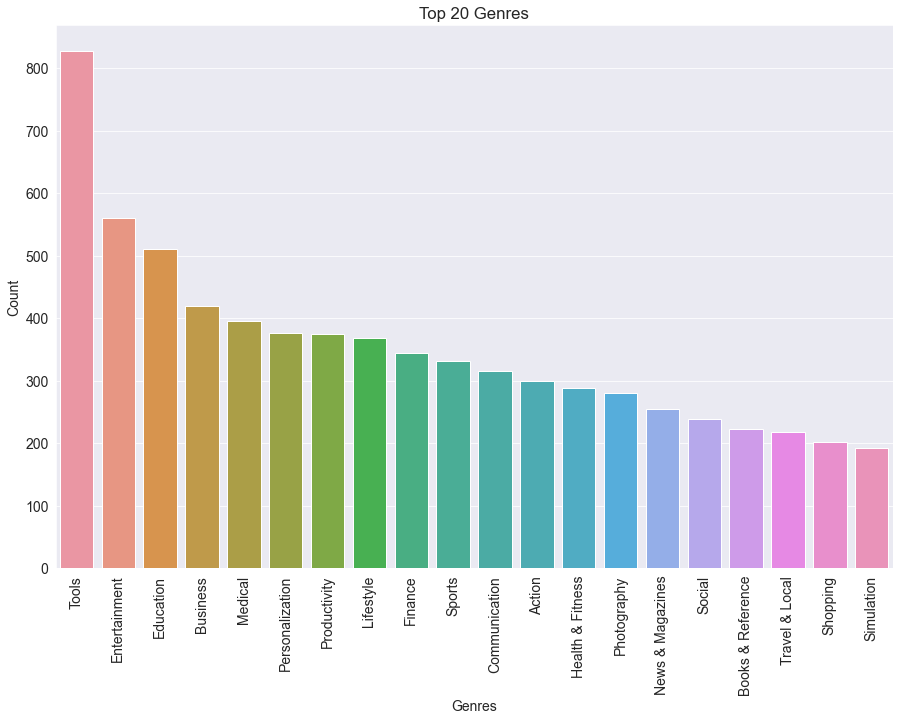

In [211]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Application')
plt.title('Top 20 Genres')
sns.barplot(top_20_geners_installs.Genres,top_20_geners_installs.Count)
plt.show()

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


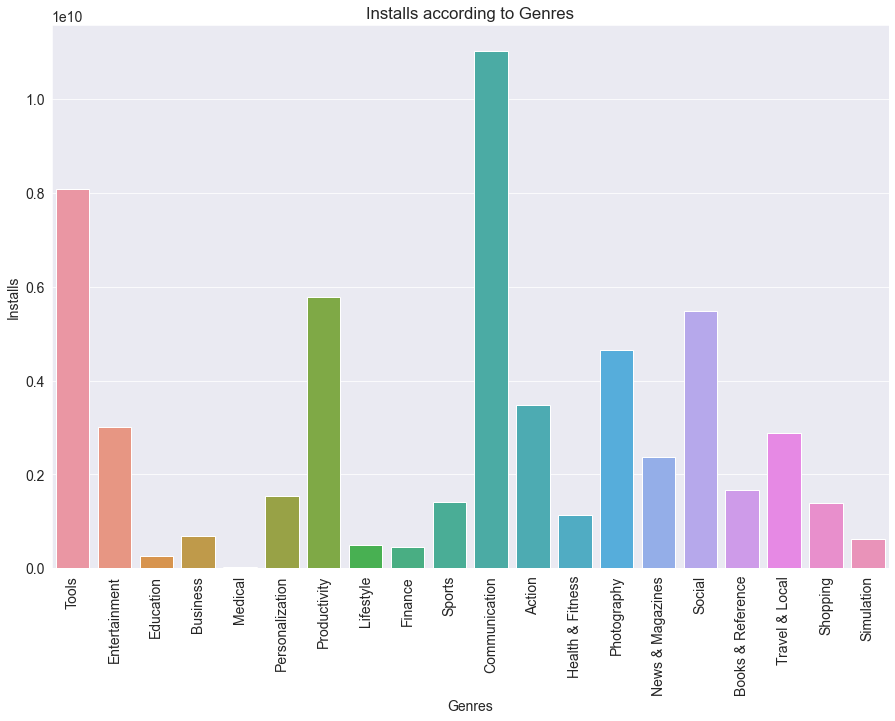

In [212]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Installs')
plt.title('Installs according to Genres')
sns.barplot(top_20_geners_installs.Genres,top_20_geners_installs.Installs)
plt.show()

In [213]:
top_category=df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [214]:
category_installs=df.groupby(['Category'])[['Installs']].sum()

In [215]:
top_category_installs=pd.merge(top_category,category_installs,on='Category')
top_20_category_installs=top_category_installs

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


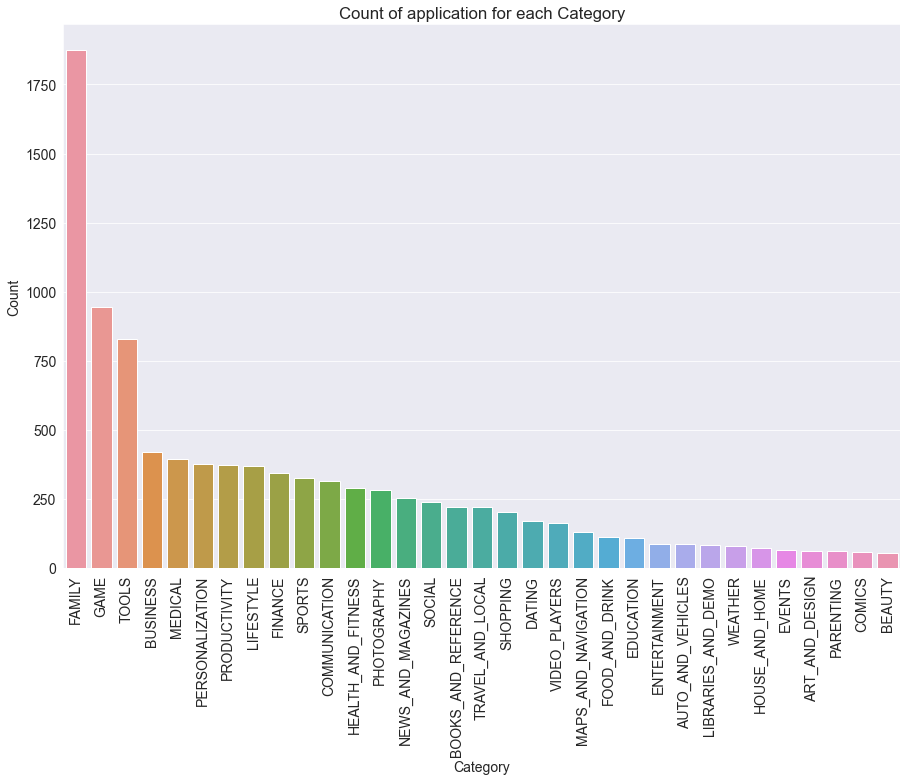

In [216]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of application')
plt.title('Count of application for each Category')
sns.barplot(top_20_category_installs.Category,top_20_category_installs.Count)
plt.show()

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


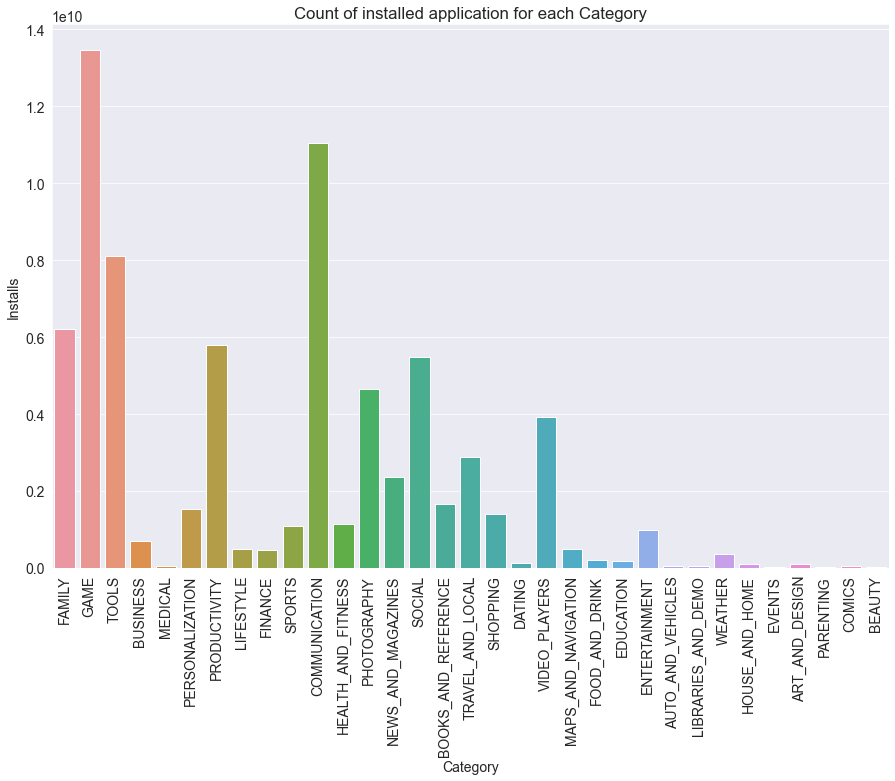

In [217]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Count of installed application for each Category')
sns.barplot(top_20_category_installs.Category,top_20_category_installs.Installs)
plt.show()

In [218]:
genres_rating_df=df.groupby(['Genres'])[['Rating']].mean()

In [219]:
genres_installs_ratings=pd.merge(top_geners_installs,genres_rating_df, on='Genres')

In [220]:
genres_installs_ratings['Rating'].describe()

count    114.000000
mean       4.248546
std        0.182448
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

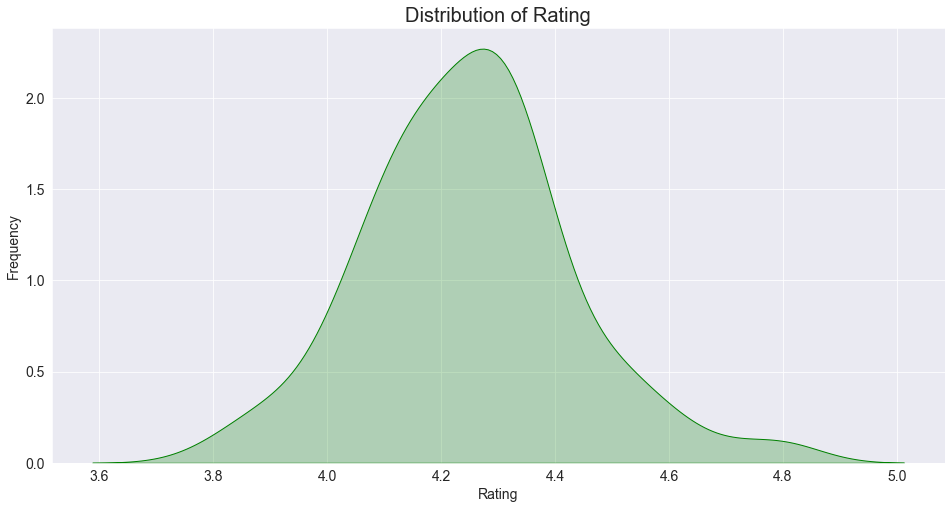

In [221]:
plt.figure(figsize=(16,8))
s=sns.kdeplot(genres_installs_ratings.Rating,color='green',shade=True)
s.set_xlabel("Rating")
s.set_ylabel("Frequency")
plt.title('Distribution of Rating',size=20)
plt.show()

In [222]:
genres_installs_ratings.sort_values('Rating',ascending=False,inplace=True)

In [223]:
highest_rate_genres=genres_installs_ratings.iloc[0:20]
lowest_rate_genres=genres_installs_ratings.iloc[-20:]
lowest_rate_genres=lowest_rate_genres[lowest_rate_genres['Rating'].notnull()]

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


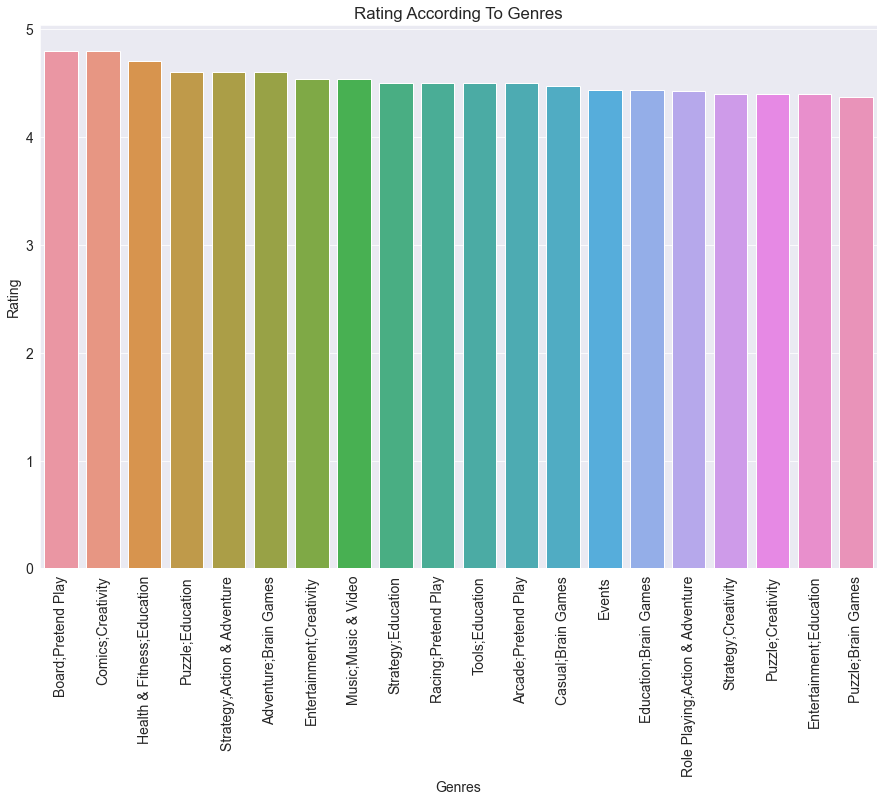

In [224]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Rating According To Genres')
sns.barplot(highest_rate_genres.Genres, highest_rate_genres.Rating)
plt.show()

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


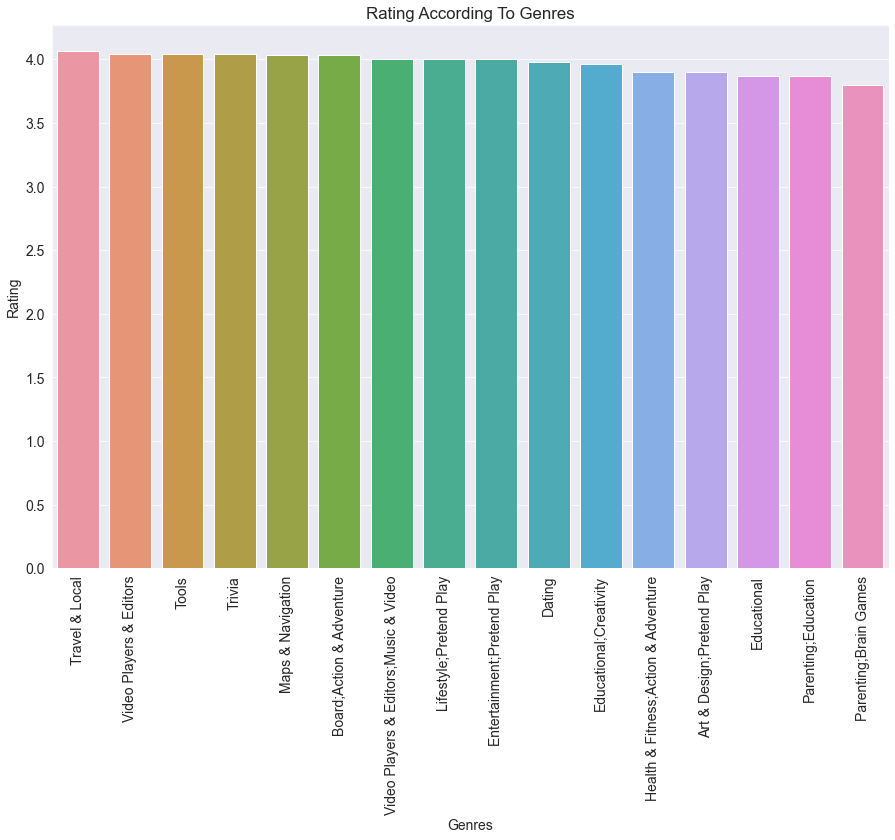

In [225]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Rating According To Genres')
sns.barplot(lowest_rate_genres.Genres, lowest_rate_genres.Rating)
plt.show()

In [226]:
app_count=df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [227]:
app_count=app_count.pivot('Category','Type','Count').fillna(0).reset_index()

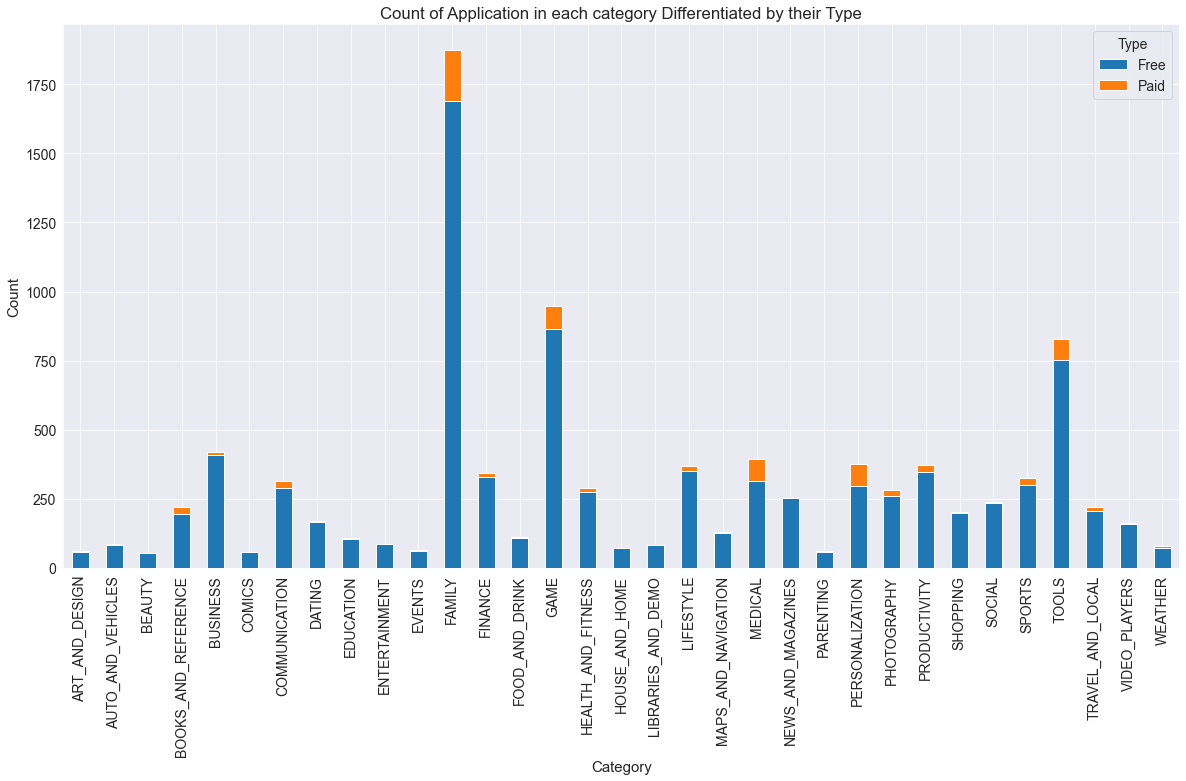

In [228]:
app_count.set_index('Category').plot(kind='bar',stacked=True,figsize=(20,10))
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of Application in each category Differentiated by their Type')
plt.show()

In [229]:
df['Gaming Category App']=df['Category']=='GAME'

In [230]:
category_type_installs=df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [231]:
category_type_installs['log_Installs']=np.log10(category_type_installs['Installs'])

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


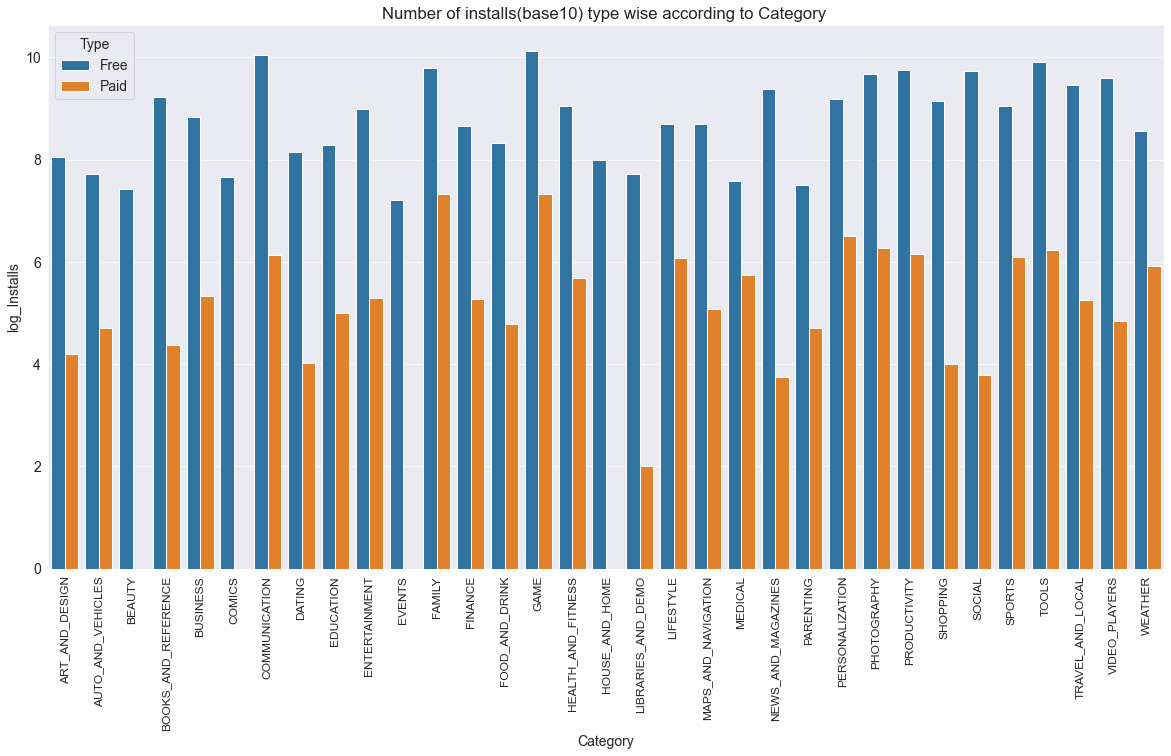

In [232]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Category')
plt.ylabel('Install(base10)')
plt.title('Number of installs(base10) type wise according to Category ')
sns.barplot('Category','log_Installs' ,hue='Type', data=category_type_installs)
plt.show()

Coneverting KB TO MB

In [233]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: str(x).replace(',','') if 'M' in str(x) else x)
df['Size']=df['Size'].apply(lambda x:float(str(x).replace('k','')) / 1000 if 'k' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float (x))

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


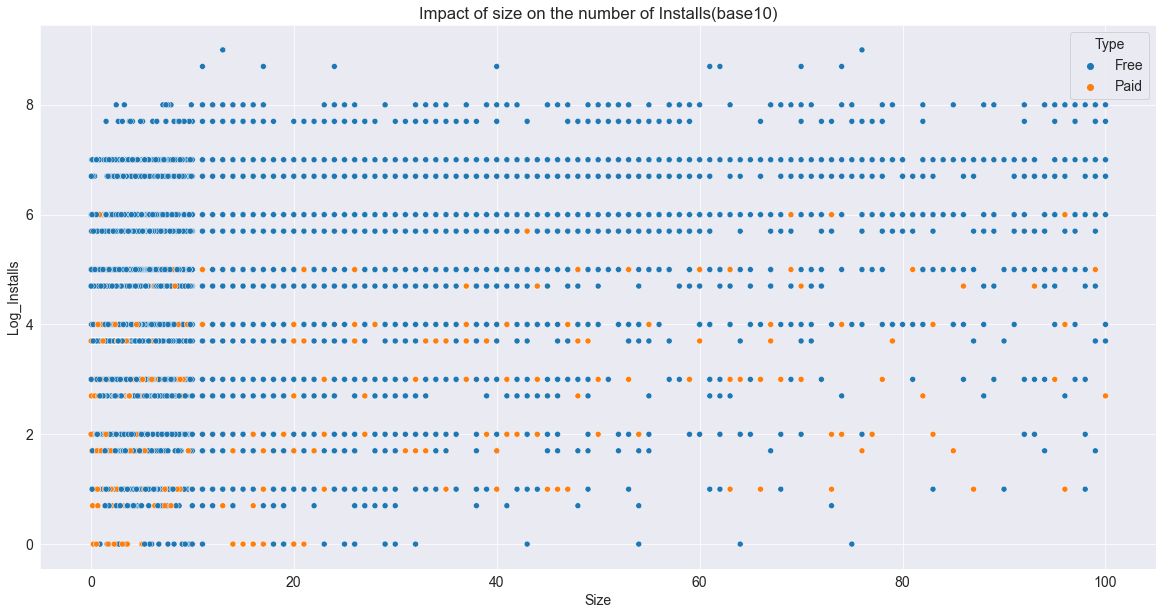

In [234]:
plt.figure(figsize=(20,10))
plt.title("Impact of size on the number of Installs(base10)")
sns.scatterplot(df['Size'],df['Log_Installs'],hue=df['Type'])
plt.show()

In [235]:
df.loc[df['Size'].isnull(),'Size']=0

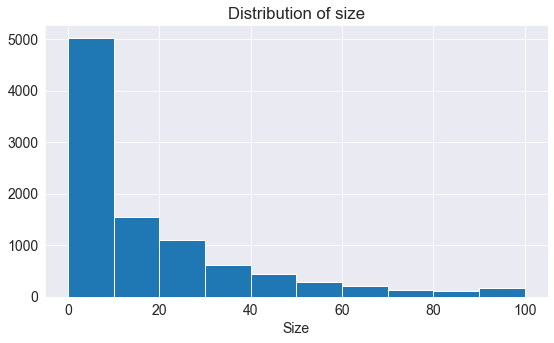

In [236]:
plt.xlabel('Size')
plt.title('Distribution of size')
plt.hist(df['Size'])
plt.show()

In [237]:
df_user_reviews=pd.read_csv('googleplaystore_user_reviews.csv')

In [238]:
merged_df=df.merge(df_user_reviews, on='App')

In [239]:
category_sentiment=merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [240]:
category_sentiment['log_sentiment_count']=np.log2(category_sentiment['Sentiment Count'])

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


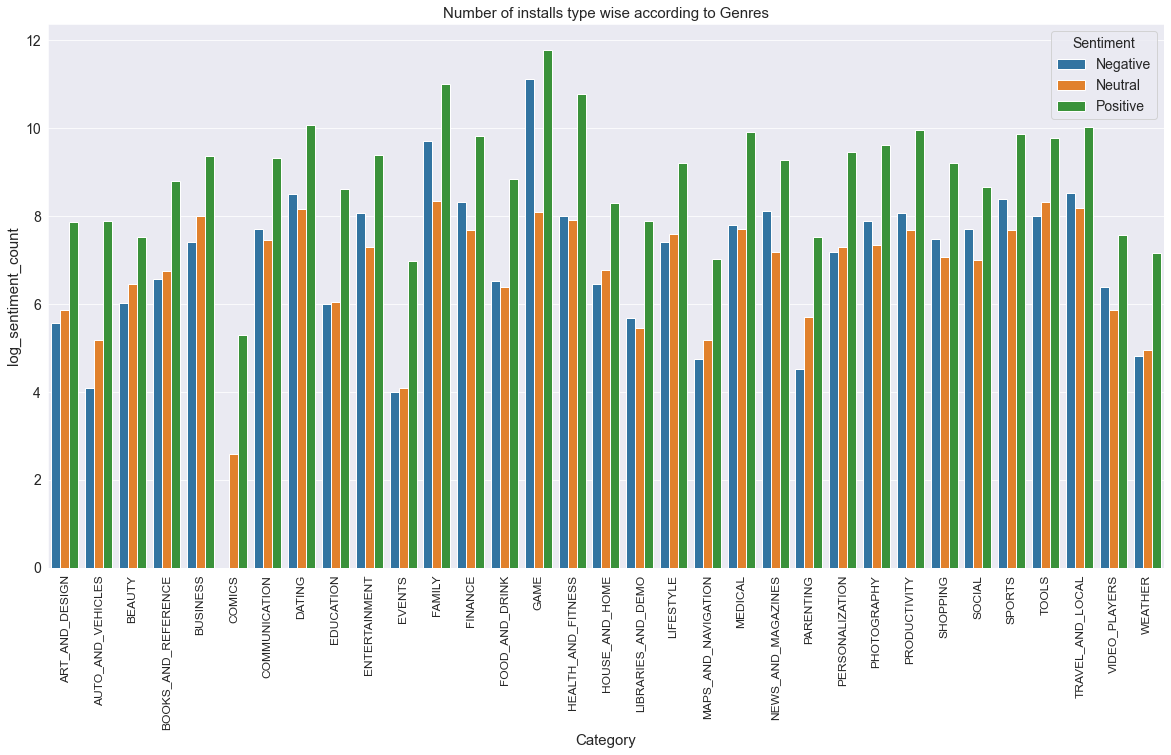

In [241]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Installs',fontsize=15)
plt.title('Number of installs type wise according to Genres',fontsize=15)
sns.barplot('Category','log_sentiment_count' ,hue='Sentiment', data=category_sentiment);
plt.show()

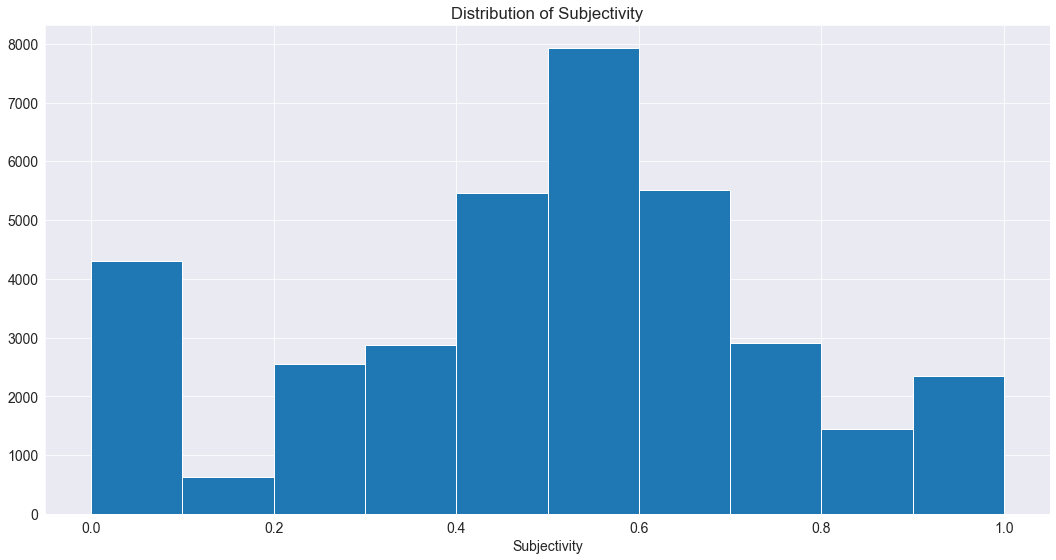

In [242]:
plt.figure(figsize=(18,9))
plt.xlabel('Subjectivity')
plt.title('Distribution of Subjectivity')
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

In [243]:
Sentiment_Subjectivity_polarity= merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectvity':'sentiment_subjectivity_avg'})

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_22812\1237071662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sentiment_Subjectivity_polarity= merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectvity':'sentiment_subjectivity_avg'})


In [244]:
merged_df['Sentiment_Subjectivity']=merged_df['Sentiment_Subjectivity'].abs()

In [245]:
merged_df['Sentiment_Polarity']=merged_df['Sentiment_Polarity'].abs()

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


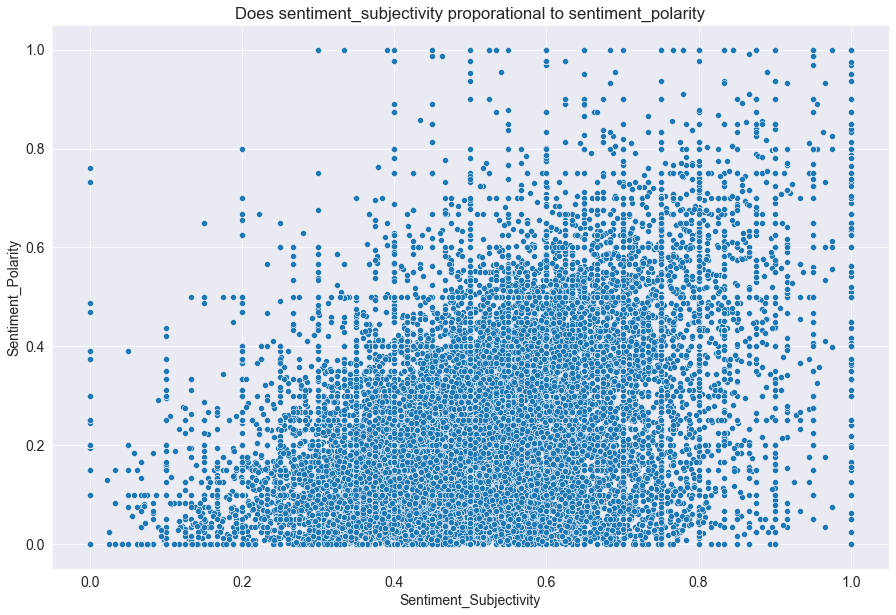

In [246]:
plt.figure(figsize=(15,10))
sns.scatterplot(merged_df['Sentiment_Subjectivity'],merged_df['Sentiment_Polarity'])
plt.title('Does sentiment_subjectivity proporational to sentiment_polarity')
plt.show()

In [247]:
review_notnull=merged_df[merged_df['Translated_Review'].notnull()]

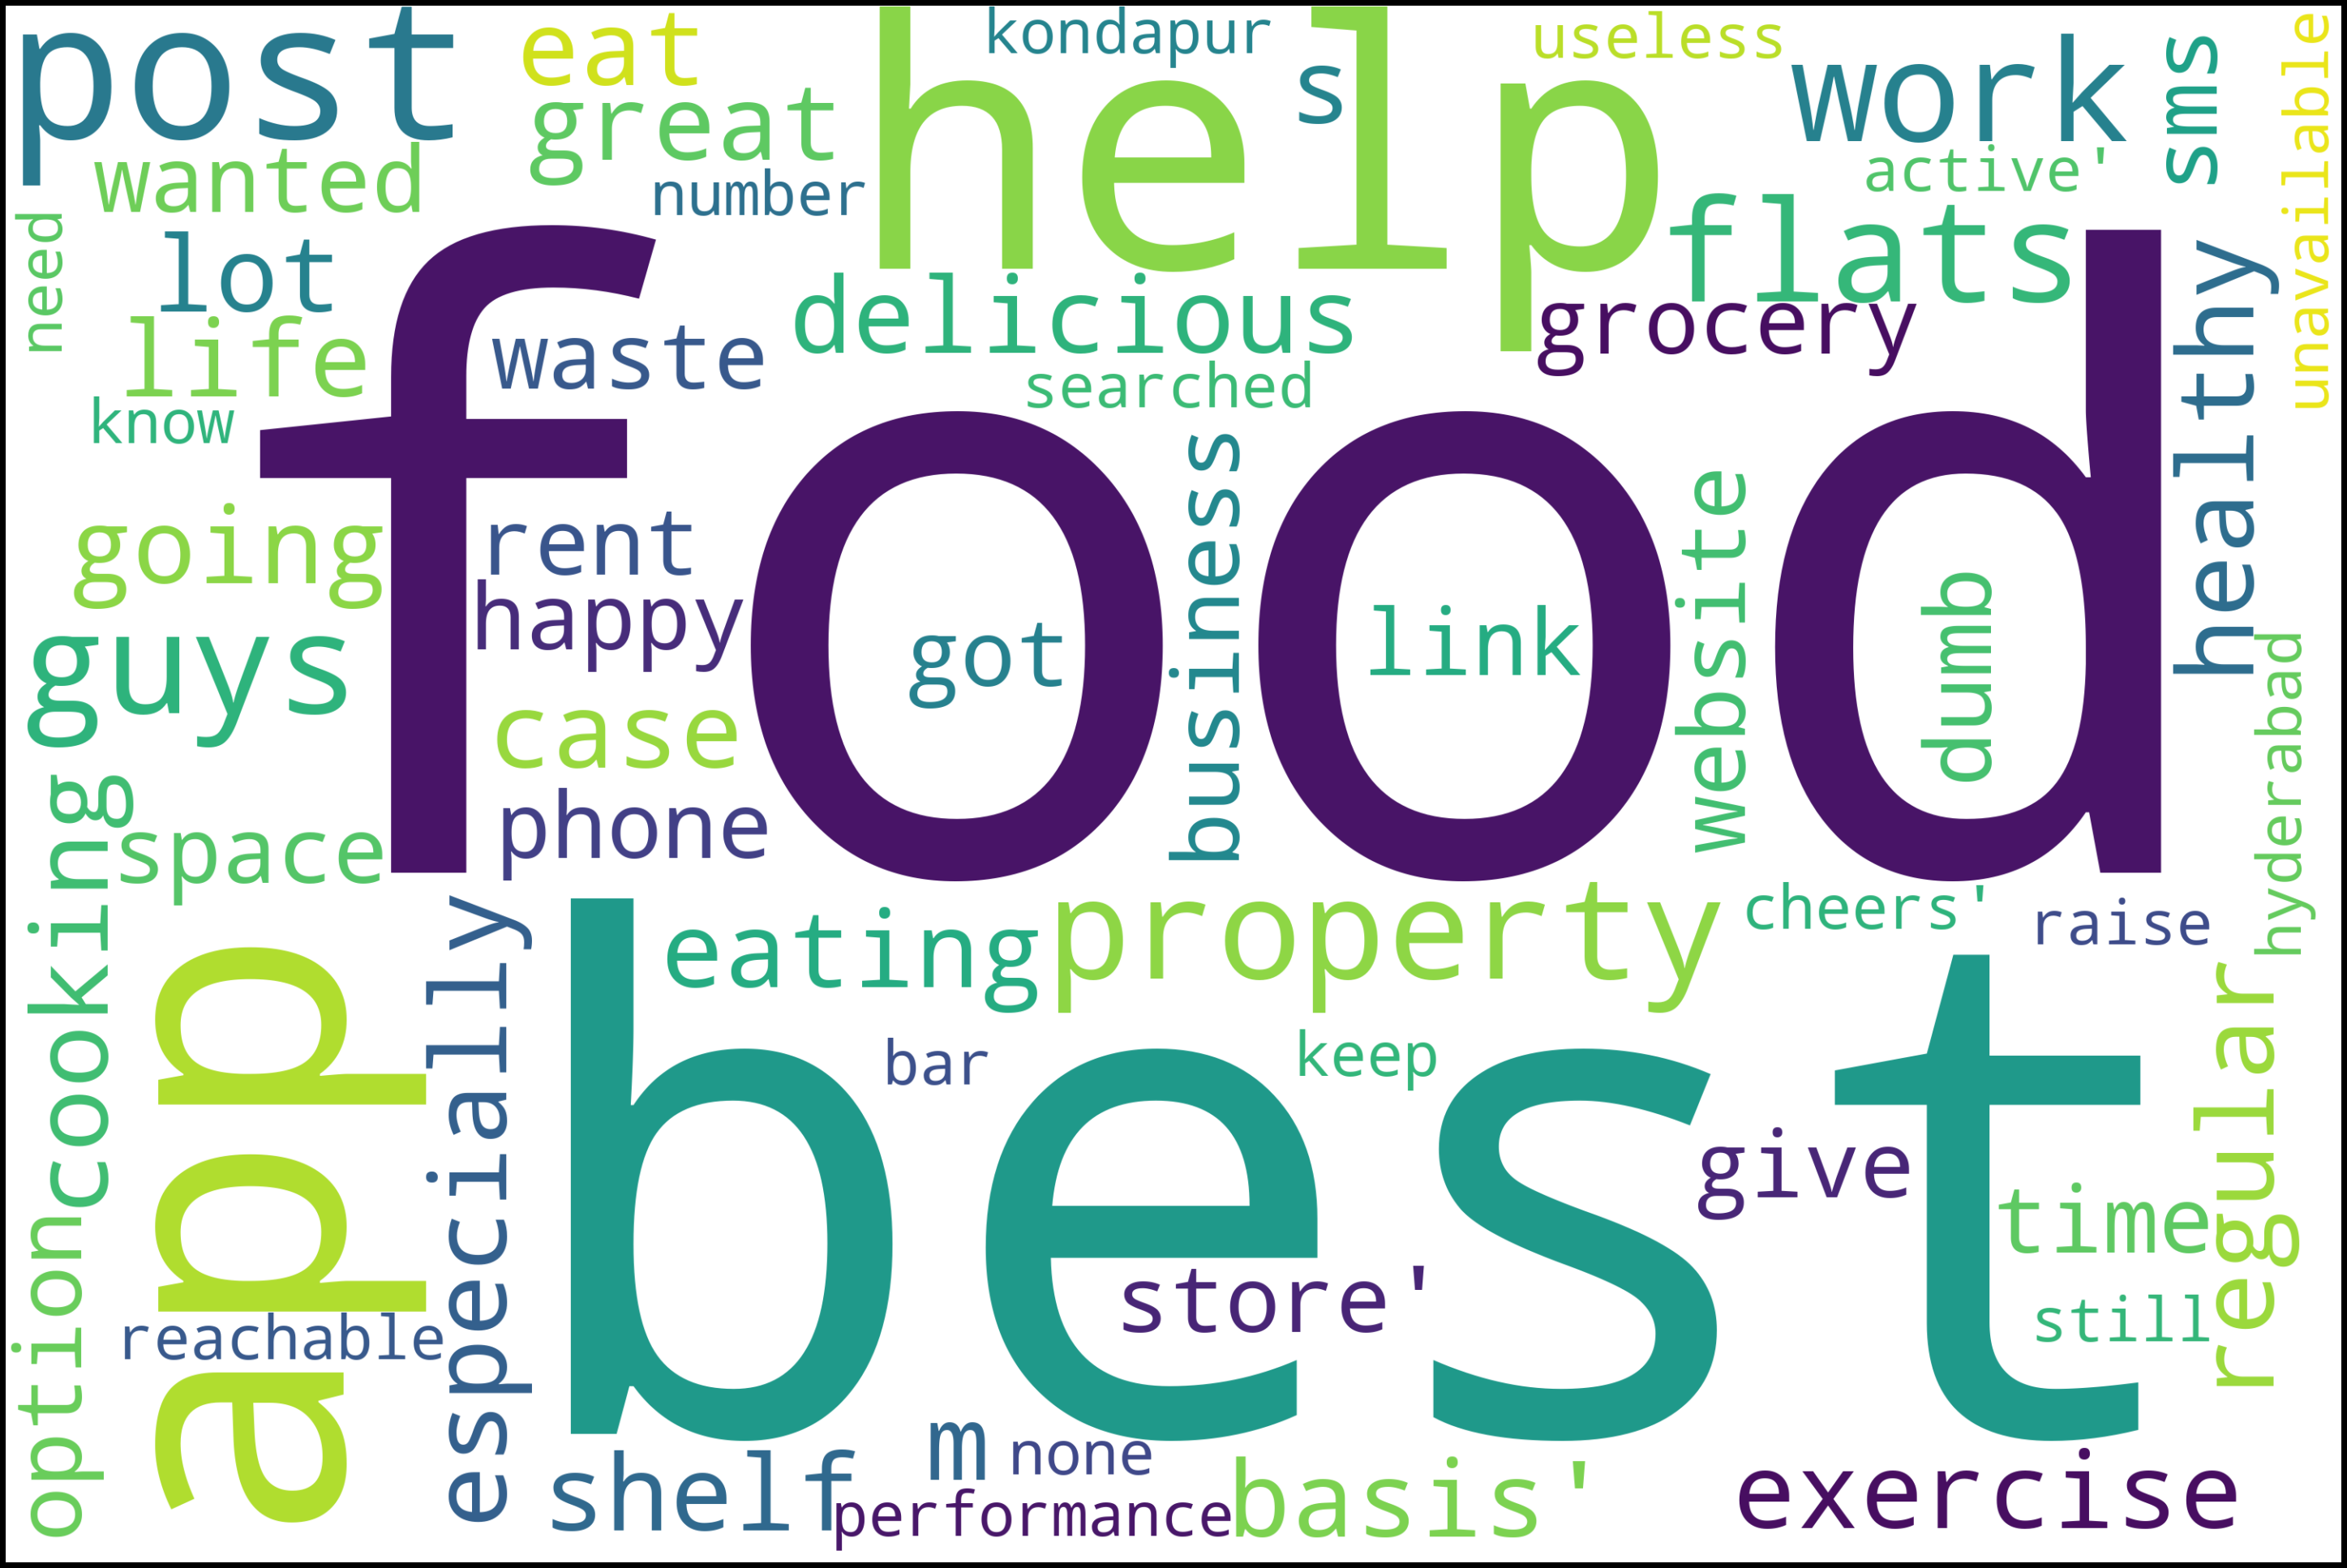

In [248]:
text = review_notnull.Translated_Review.values
wordcloud=WordCloud(
    width= 3000, height=2000,
    background_color='white',
    stopwords=STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize=(40,35),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



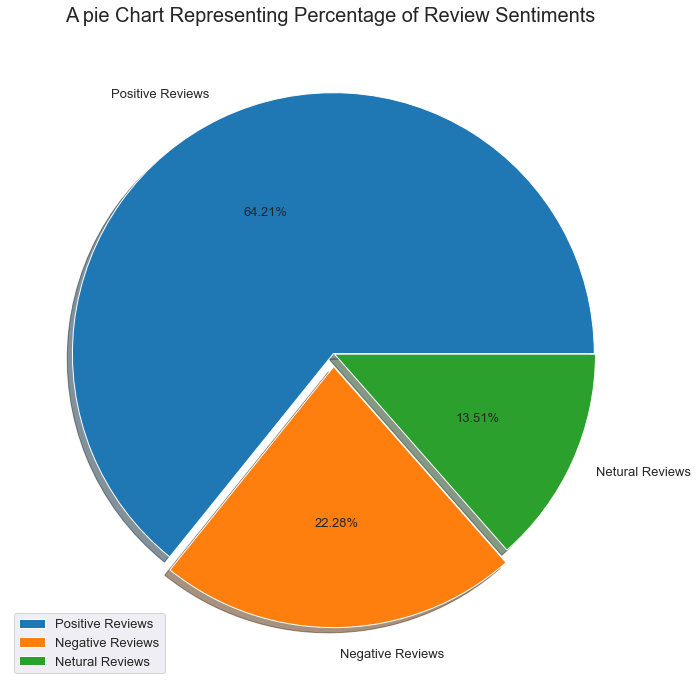

In [249]:
import matplotlib
counts=list(merged_df['Sentiment'].value_counts())
labels='Positive Reviews','Negative Reviews','Netural Reviews'
matplotlib.rcParams['font.size']=13
matplotlib.rcParams['figure.figsize']=(12,12)
plt.pie(counts,labels=labels,explode=[0, 0.05,0.005],shadow=True,autopct='%.2f%%')
plt.title('A pie Chart Representing Percentage of Review Sentiments ',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()